<a href="https://colab.research.google.com/github/VrajPatel18011/202418011/blob/main/Unsupervised(Project_Feature_Finder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:** Customer Behavior Prediction and Segmentation in E-Commerce

## **Introduction**

---

### **Objective:**

The objective of this project is to develop and evaluate a comprehensive machine learning framework for understanding and predicting customer behavior in the e-commerce domain. Specifically, the project aims to:

1. **Predict Customer Budget**: Using regression techniques, predict the likely budget of a customer for future purchases based on their demographics, historical spending patterns, and transaction history.

2. **Classify Purchase Likelihood**: Apply classification algorithms to estimate the probability of a customer completing a purchase for items in their cart, categorizing the likelihood into high, medium, or low based on customer characteristics, product preferences, and past behavior.

3. **Segment Customers Based on Spending Behavior**: Implement unsupervised learning methods to segment customers into distinct groups based on their spending behavior, helping to identify low, average, and high-value customers.
---

The ultimate goal is to create a predictive system that can not only forecast customer spending behavior but also provide actionable insights for improving customer targeting, personalized marketing, and inventory management in an e-commerce environment.

### **Table of Contents**
1. Dependencies
2. Data Loading
3. Data Preprocessing
4. Data Visualization
5. Model Evaluation
6. Conclusion

# **Dependencies**

### This project requires the following Python libraries:

* pandas
* numpy
* seaborn
* matplotlib
* scikit

# **Data Loading and Overview**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Project/Unsupervised.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    49998 non-null  float64
 1   Customer_ID       49998 non-null  float64
 2   City              49998 non-null  object 
 3   State             49998 non-null  object 
 4   Zipcode           49998 non-null  float64
 5   Country           49998 non-null  object 
 6   Age               49998 non-null  int64  
 7   Gender            49998 non-null  object 
 8   Income            49998 non-null  object 
 9   Customer_Segment  49998 non-null  object 
 10  Total_Purchases   49998 non-null  float64
 11  Amount            49998 non-null  float64
 12  Total_Amount      49998 non-null  float64
 13  Product_Category  49998 non-null  object 
 14  Product_Brand     49998 non-null  object 
 15  Product_Type      49998 non-null  object 
 16  Feedback          49998 non-null  object

# **Data Preprocessing**

####  List of changes in dataset

* Sum of Null values

In [ ]:
df = pd.read_excel('SemiSupervised_Dataset.xlsx')
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
City,0
State,0
Zipcode,0
Country,0
Age,0
Gender,0
Income,0
Customer_Segment,0


* Fill Null values

In [ ]:
cat = df.select_dtypes(include=['object']).columns

num = df.select_dtypes(exclude=['object']).columns

for i in cat:
  df[i] = df[i].fillna(df[i].mode()[0])

for i in num:
  df[i] = df[i].fillna(df[i].mean())


* After Cleaning Sum of Null values

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
City,0
State,0
Zipcode,0
Country,0
Age,0
Gender,0
Income,0
Customer_Segment,0


# **Data Visualizing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Pairplot of Numeric Features

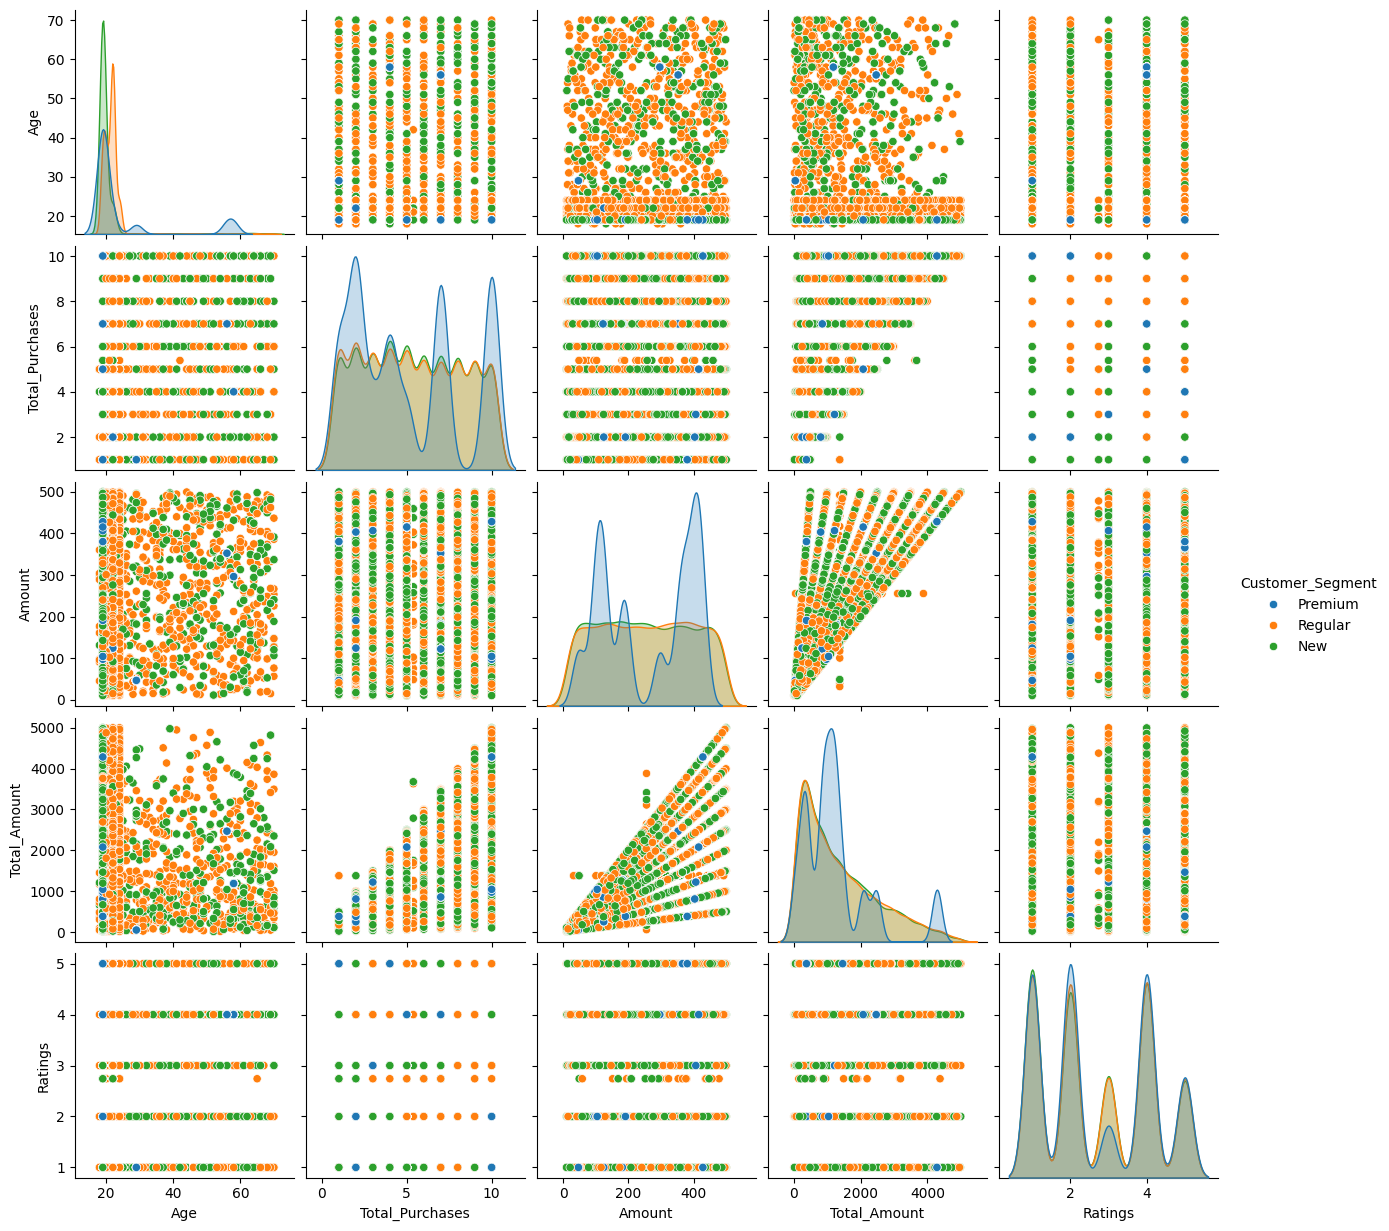

In [ ]:
numeric_columns = ['Age', 'Income', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

sns.pairplot(df[numeric_columns + ['Customer_Segment']], hue='Customer_Segment')

plt.show()

### Figuring different relationship in dataset

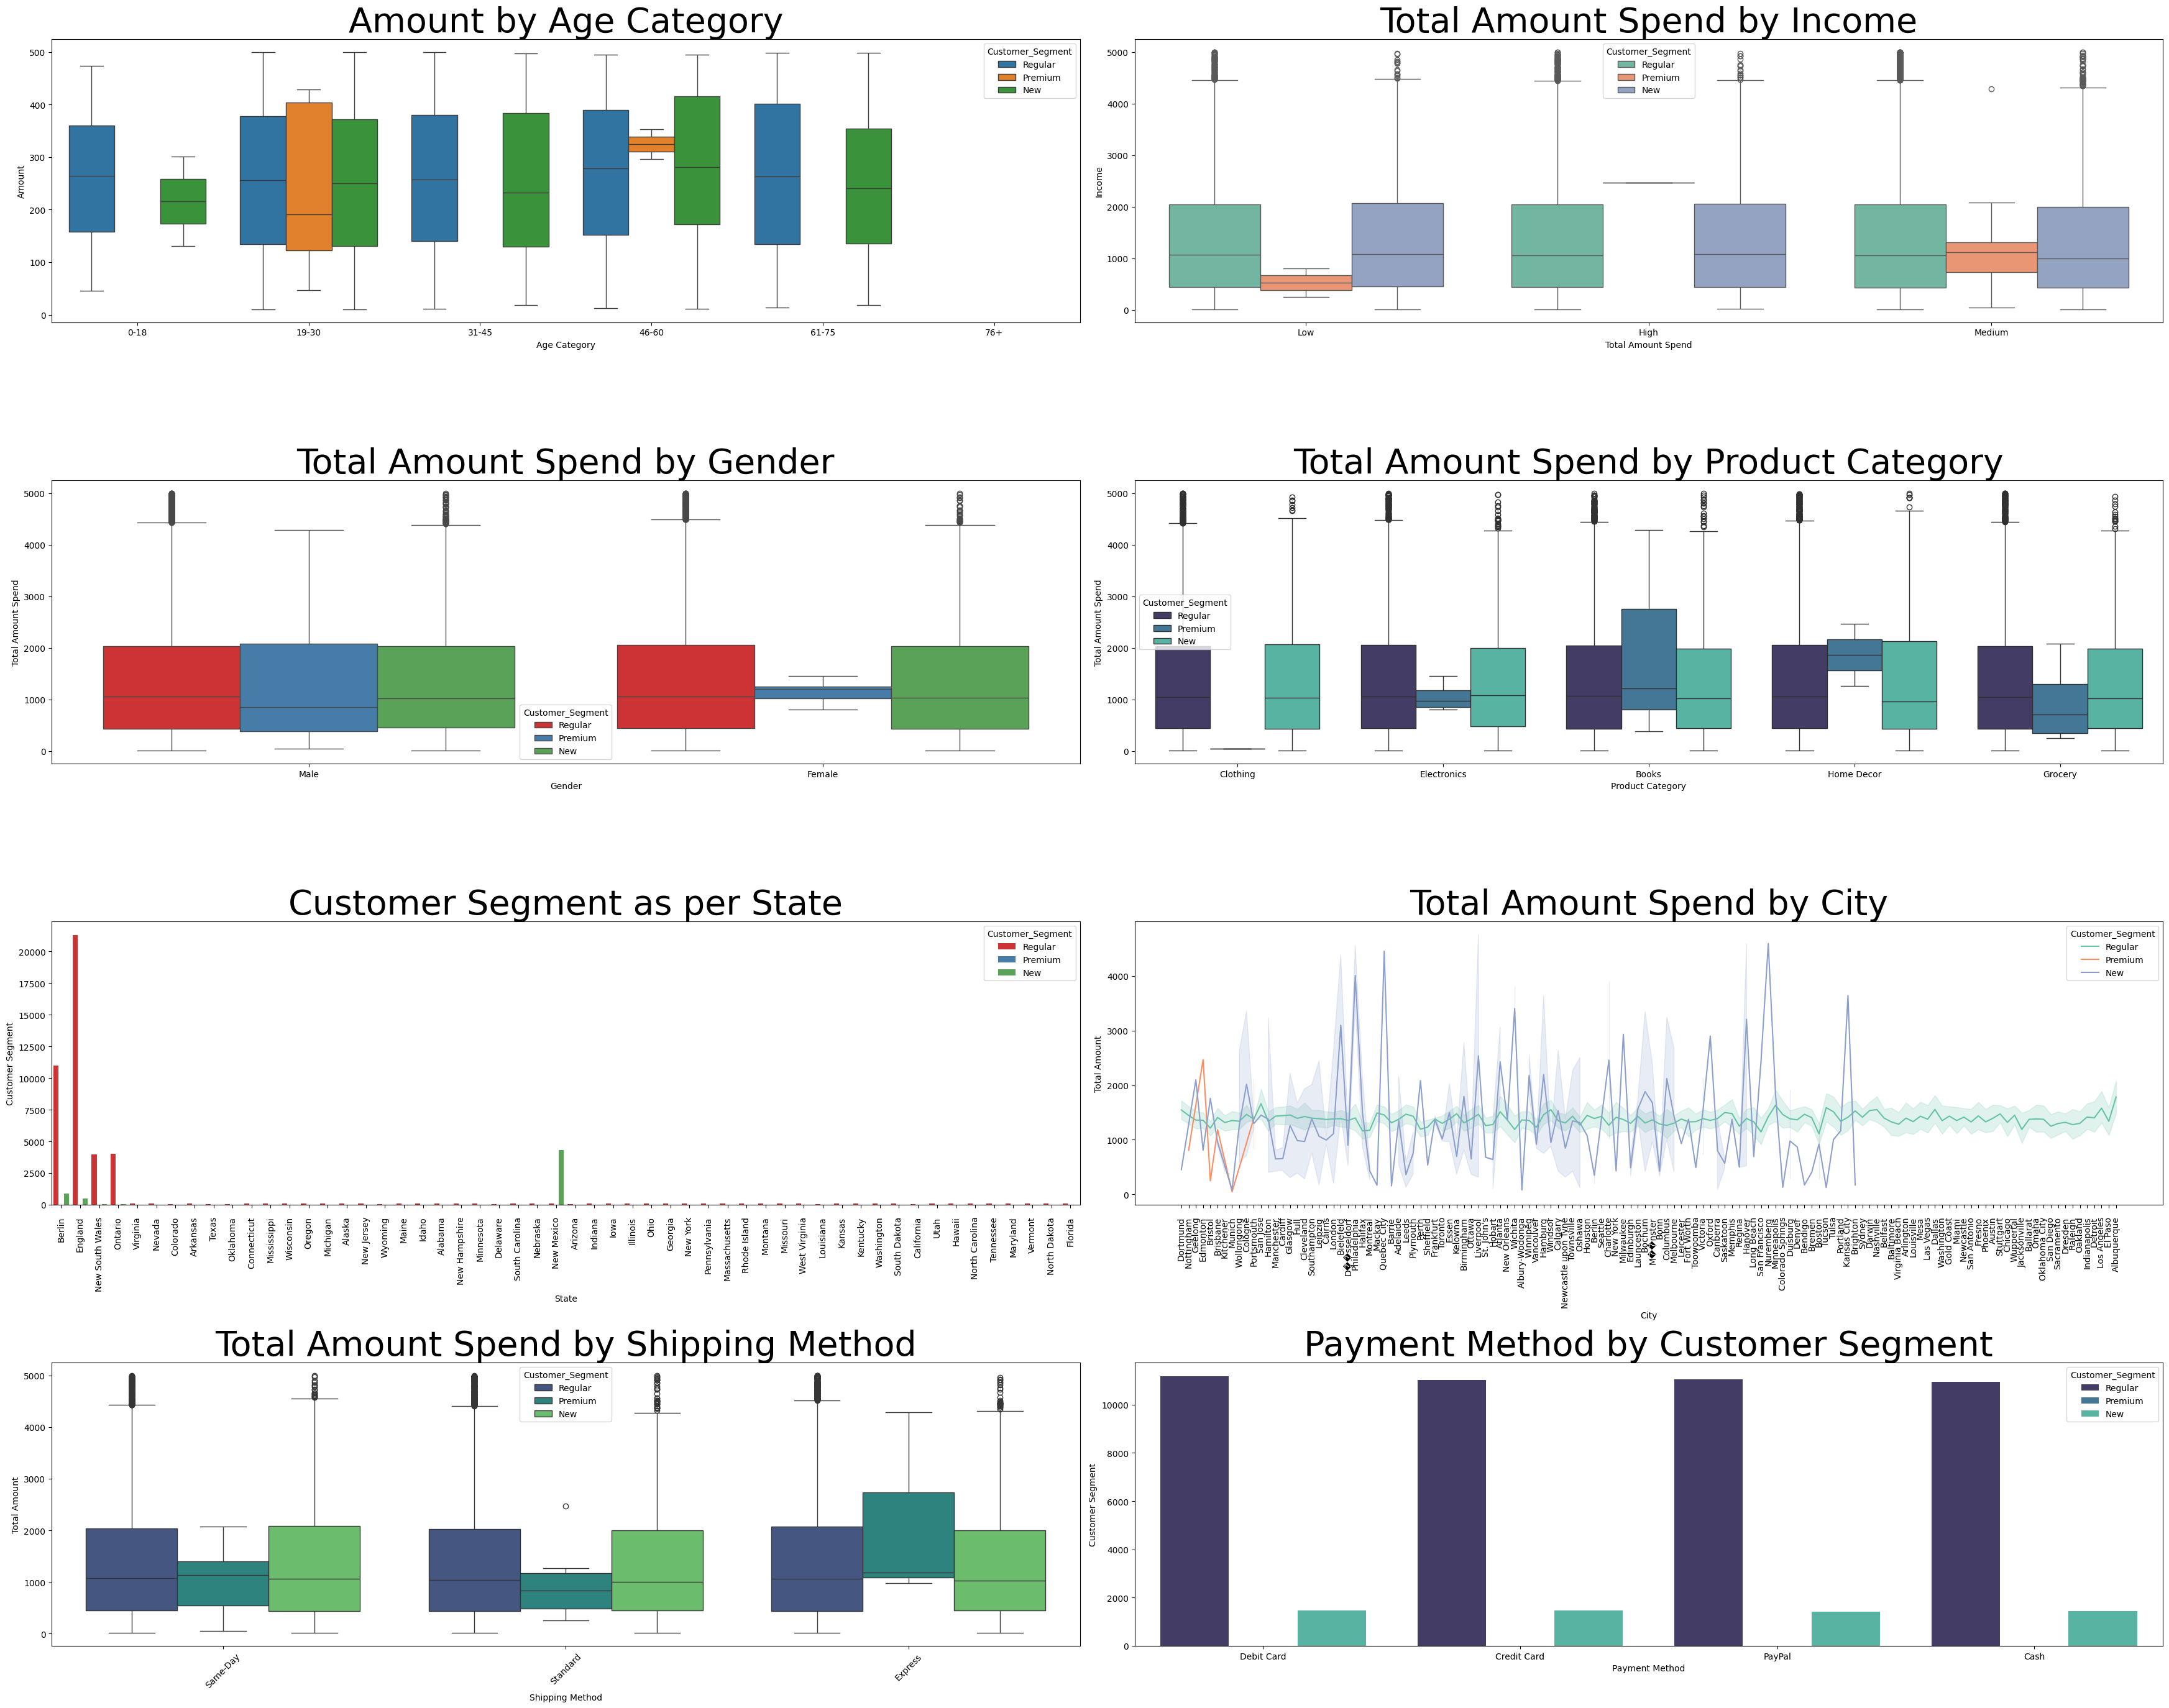

In [ ]:
df['Age Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 75, 100],
                             labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76+'])

fig, axes = plt.subplots(4, 2, figsize=(35, 30))

sns.boxplot(x='Age Category', y='Amount', hue='Customer_Segment', palette='tab10', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Amount by Age Category',fontsize=40)
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Amount')

sns.boxplot(x='Income', y='Total_Amount', hue='Customer_Segment', palette='Set2', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Amount Spend by Income',fontsize=40)
axes[0, 1].set_xlabel('Total Amount Spend')
axes[0, 1].set_ylabel('Income')

sns.boxplot(x='Gender', y='Total_Amount', hue='Customer_Segment', palette='Set1', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Amount Spend by Gender',fontsize=40)
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Total Amount Spend')

sns.boxplot(x='Product_Category', y='Total_Amount', hue='Customer_Segment', palette='mako', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Total Amount Spend by Product Category',fontsize=40)
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Total Amount Spend')

sns.countplot(x='State', hue='Customer_Segment', palette='Set1', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Customer Segment as per State',fontsize=40)
axes[2, 0].set_xlabel('State')
axes[2, 0].set_ylabel('Customer Segment')
axes[2, 0].tick_params(axis='x', rotation=90, pad=10)

sns.lineplot(x='City', y='Total_Amount', hue='Customer_Segment', palette='Set2', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Total Amount Spend by City',fontsize=40)
axes[2, 1].set_xlabel('City')
axes[2, 1].set_ylabel('Total Amount')
axes[2, 1].tick_params(axis='x', rotation=90, pad=10)

sns.boxplot(x='Shipping_Method', y='Total_Amount', hue='Customer_Segment', palette='viridis', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Total Amount Spend by Shipping Method',fontsize=40)
axes[3, 0].set_xlabel('Shipping Method')
axes[3, 0].set_ylabel('Total Amount')
axes[3, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Payment_Method', hue='Customer_Segment', palette='mako', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Payment Method by Customer Segment',fontsize=40)
axes[3, 1].set_xlabel('Payment Method')
axes[3, 1].set_ylabel('Customer Segment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Repeating some features again

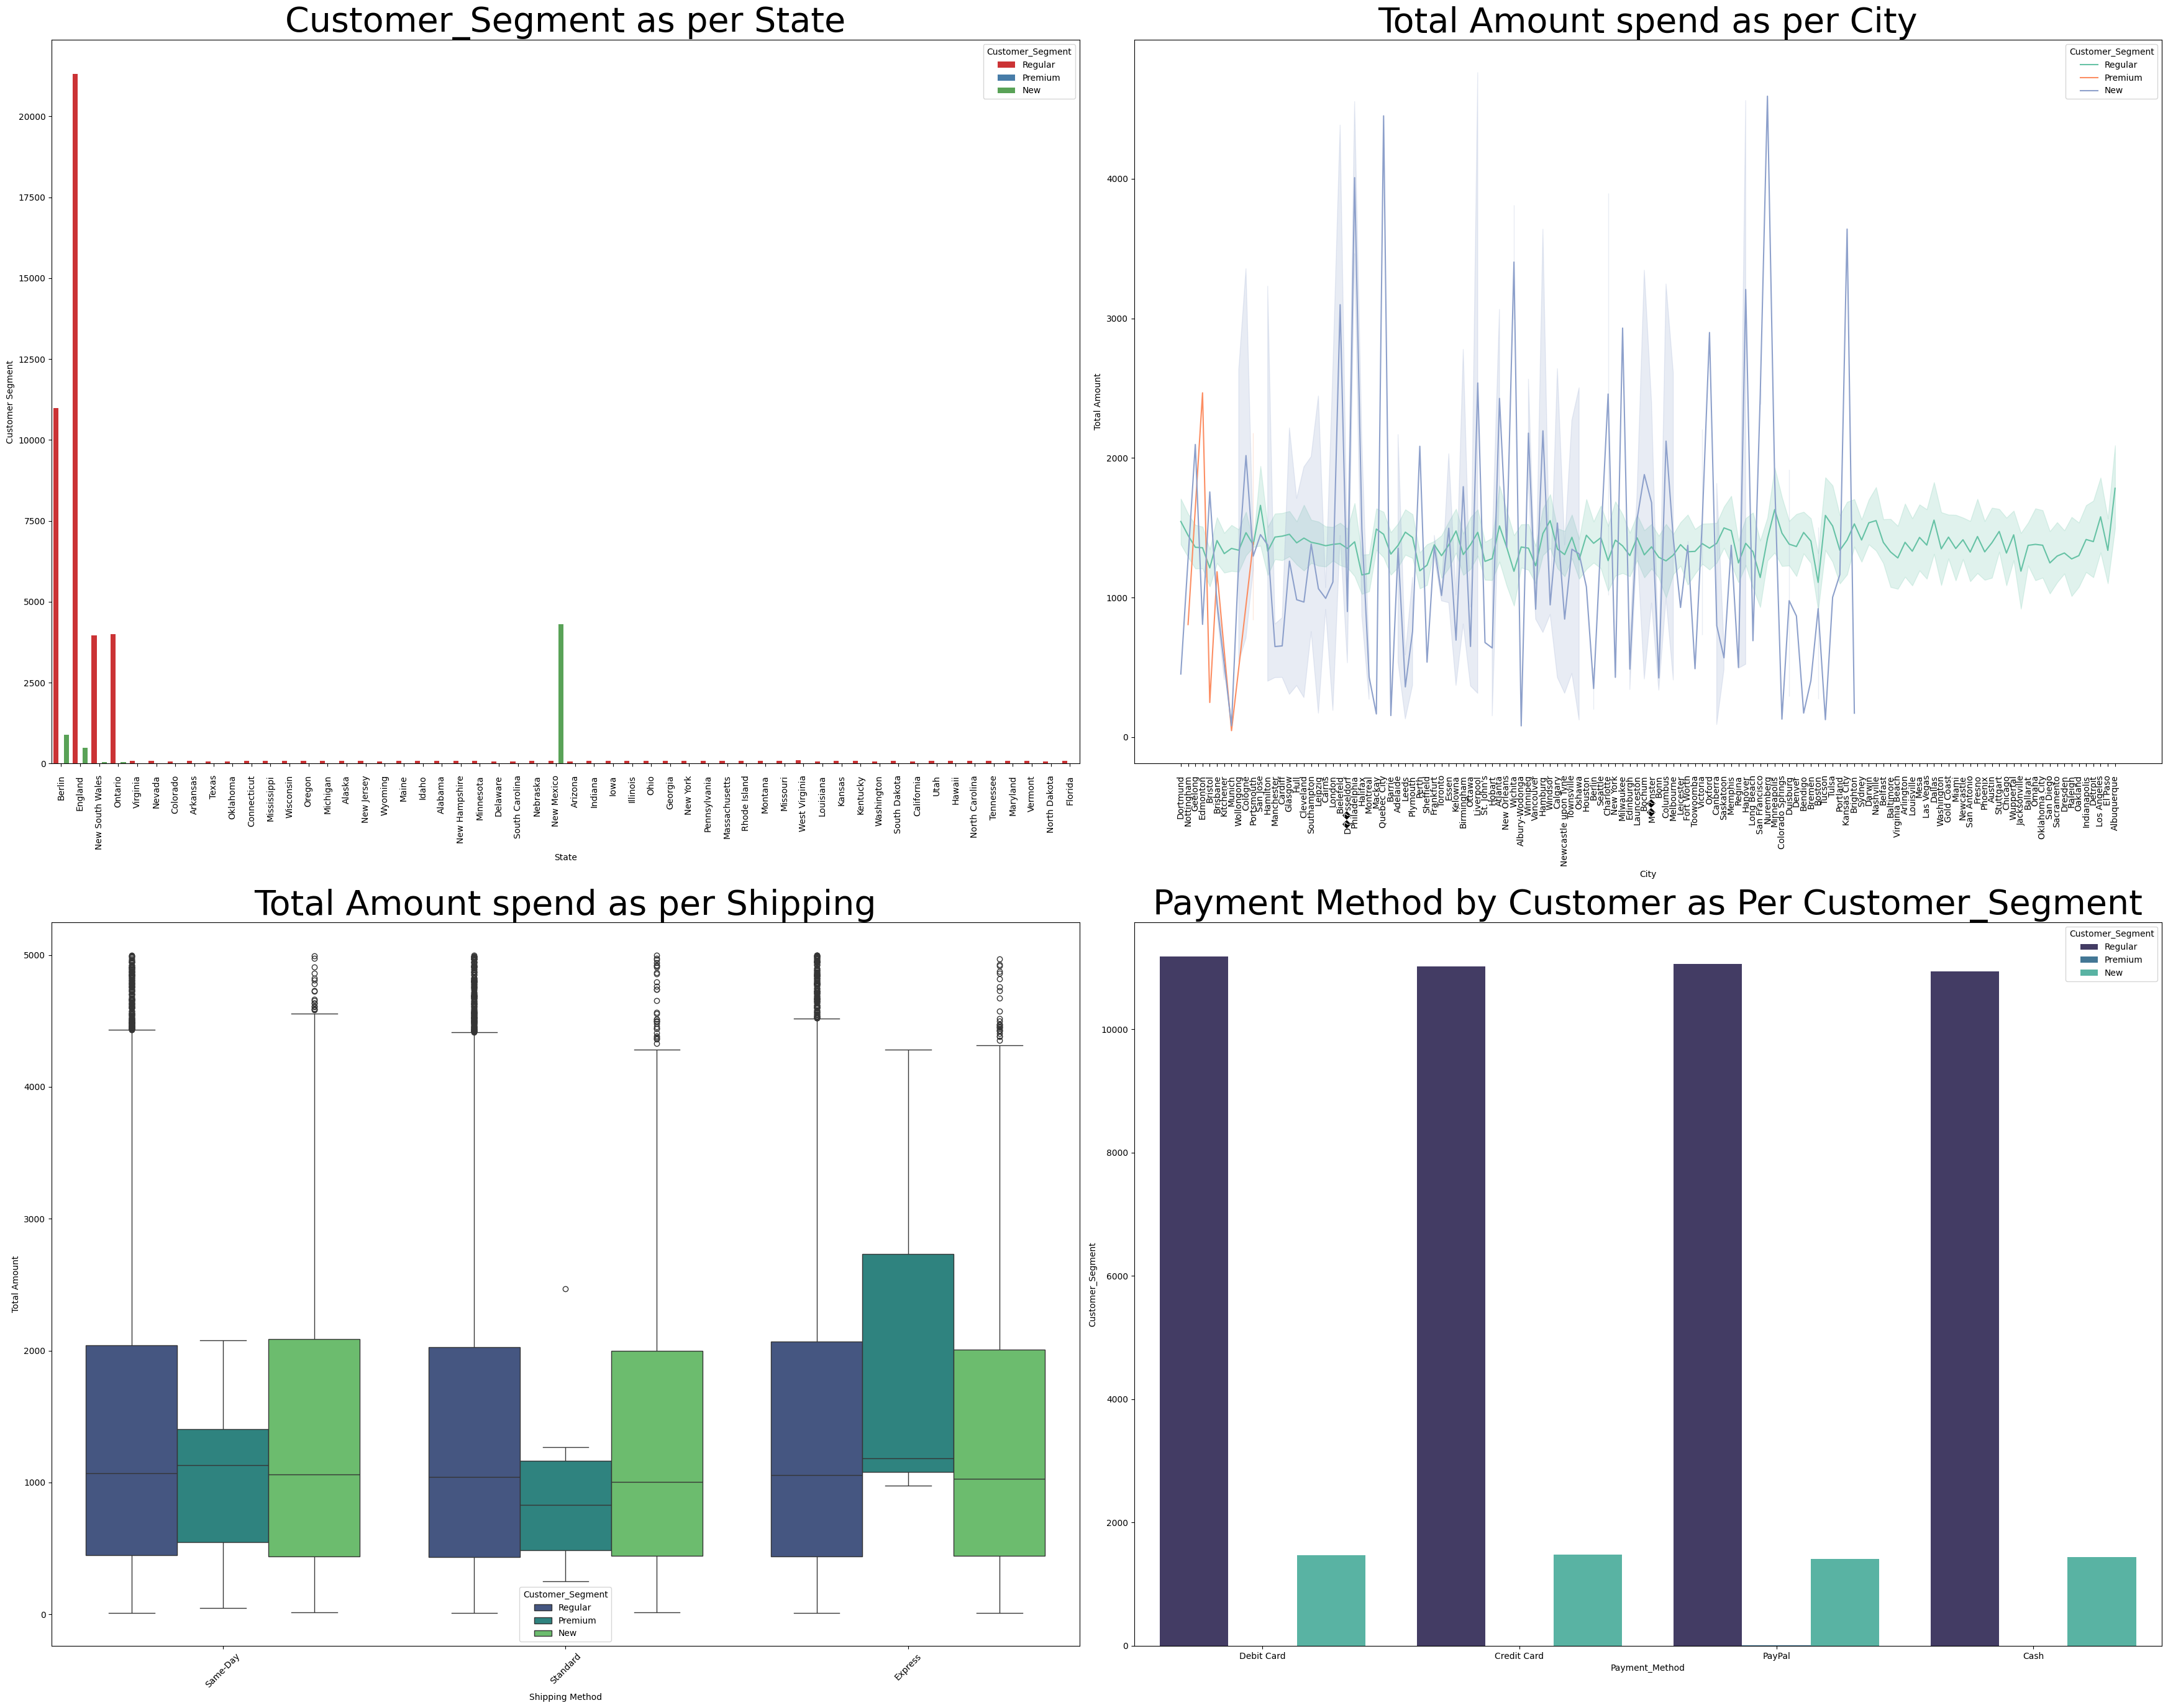

In [ ]:
df['Age Category'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 75, 100], labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76+'])
fig, axes = plt.subplots(2, 2, figsize=(35, 30))

sns.countplot(x='State',hue='Customer_Segment',palette='Set1', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Customer_Segment as per State',fontsize=40)
axes[0, 0].set_xlabel('State')
axes[0, 0].set_ylabel('Customer Segment')
axes[0, 0].tick_params(axis='x', rotation=90,pad=10)

sns.lineplot(x='City', y='Total_Amount',hue='Customer_Segment',palette='Set2', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Amount spend as per City',fontsize=40)
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Total Amount')
axes[0, 1].tick_params(axis='x', rotation=90,pad=10)

sns.boxplot(x='Shipping_Method', y='Total_Amount',hue='Customer_Segment',palette='viridis', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Amount spend as per Shipping',fontsize=40)
axes[1, 0].set_xlabel('Shipping Method')
axes[1, 0].set_ylabel('Total Amount')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Payment_Method',hue='Customer_Segment',palette='mako', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Payment Method by Customer as Per Customer_Segment',fontsize=40)
axes[1, 1].set_xlabel('Payment_Method')
axes[1, 1].set_ylabel('Customer_Segment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Heatmap of Correlation for Numerical Variables

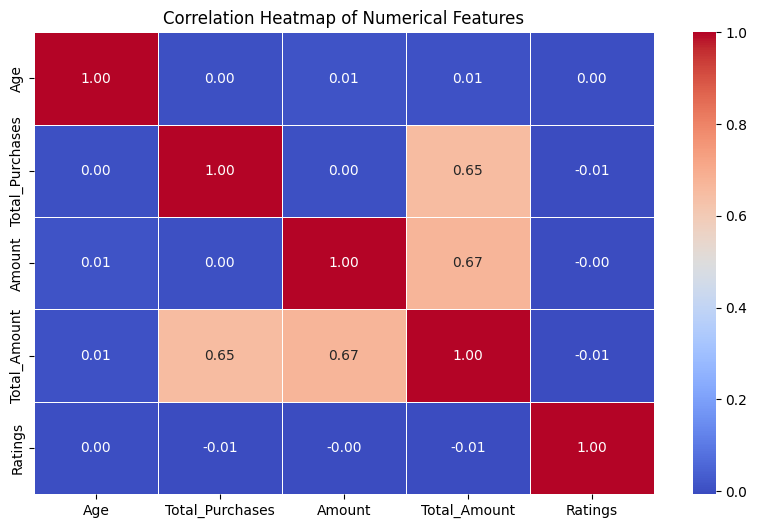

In [ ]:
numerical_columns = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Model Evaluation**

Evaluating model: LabelSpreading
LabelSpreading Cross-validation scores: [0.908      0.902      0.902      0.90461308 0.90486311]
LabelSpreading Mean cross-validation score: 0.9042952369046132
LabelSpreading Test accuracy: 0.9146
LabelSpreading Classification Report:
              precision    recall  f1-score   support

         New       0.91      0.82      0.86      1628
     Premium       1.00      1.00      1.00      1685
     Regular       0.84      0.92      0.88      1687

    accuracy                           0.91      5000
   macro avg       0.92      0.91      0.91      5000
weighted avg       0.92      0.91      0.91      5000



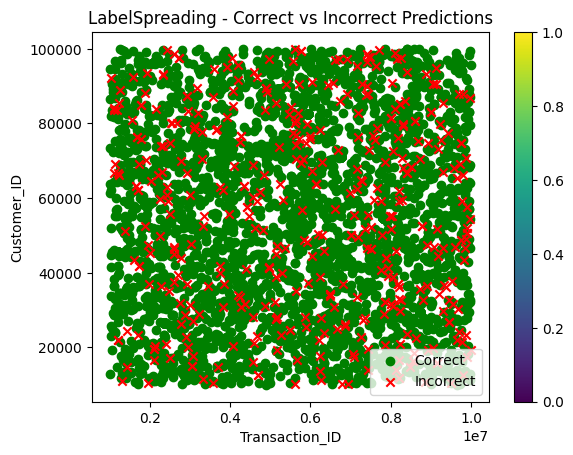

Evaluating model: LabelPropagation
LabelPropagation Cross-validation scores: [0.9025     0.89775    0.897375   0.90098762 0.90336292]
LabelPropagation Mean cross-validation score: 0.9003951087635956
LabelPropagation Test accuracy: 0.913
LabelPropagation Classification Report:
              precision    recall  f1-score   support

         New       0.88      0.85      0.87      1628
     Premium       1.00      1.00      1.00      1685
     Regular       0.86      0.89      0.87      1687

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



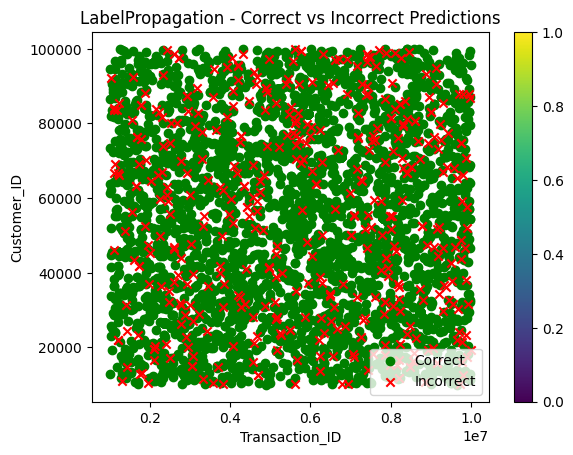

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

def load_and_preprocess(file_path, target_column):

    df.fillna(df.mode().iloc[0], inplace=True)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    cat_columns = X.select_dtypes(include=["object"]).columns.tolist()
    num_columns = X.select_dtypes(exclude=["object"]).columns.tolist()
    preprocessor = ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), num_columns),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_columns)
    ])
    return X_train, X_test, y_train, y_test, preprocessor

def create_pipeline(preprocessor, model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=9)),
        ('model', model)
    ])

def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-validation scores: {cv_scores}")
    print(f"{model_name} Mean cross-validation score: {cv_scores.mean()}")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{model_name} Test accuracy:", pipeline.score(X_test, y_test))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    if X_test.shape[1] > 1:
        label_encoder = LabelEncoder()
        y_test_encoded = label_encoder.fit_transform(y_test)
        y_pred_encoded = label_encoder.transform(y_pred)
        correct_predictions = y_pred_encoded == y_test_encoded
        incorrect_predictions = ~correct_predictions
        plt.scatter(X_test.iloc[correct_predictions, 0], X_test.iloc[correct_predictions, 1],
                    c='green', label='Correct', marker='o')
        plt.scatter(X_test.iloc[incorrect_predictions, 0], X_test.iloc[incorrect_predictions, 1],
                    c='red', label='Incorrect', marker='x')
        plt.title(f"{model_name} - Correct vs Incorrect Predictions")
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.legend()
        plt.colorbar()
        plt.show()
    else:
        print(f"{model_name} - Data is not 2D, scatter plot cannot be generated.")

def main(file_path, target_column):
    X_train, X_test, y_train, y_test, preprocessor = load_and_preprocess(file_path, target_column)

    models = {
        'LabelSpreading': LabelSpreading(kernel='knn', n_neighbors=10, gamma=0.5, max_iter=2000),
        'LabelPropagation': LabelPropagation(kernel='knn', n_neighbors=10, gamma=0.5, max_iter=2000)
    }

    for model_name, model in models.items():
        print(f"Evaluating model: {model_name}")
        pipeline = create_pipeline(preprocessor, model)
        evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name)

if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/Project/Unsupervised.xlsx'
    target_column = 'Customer_Segment'
    main(file_path, target_column)


# KMeans and DBSCAN

Evaluating DBSCAN
DBSCAN Clustering labels for test data: [ 0  1  2 ...  1  5 12]


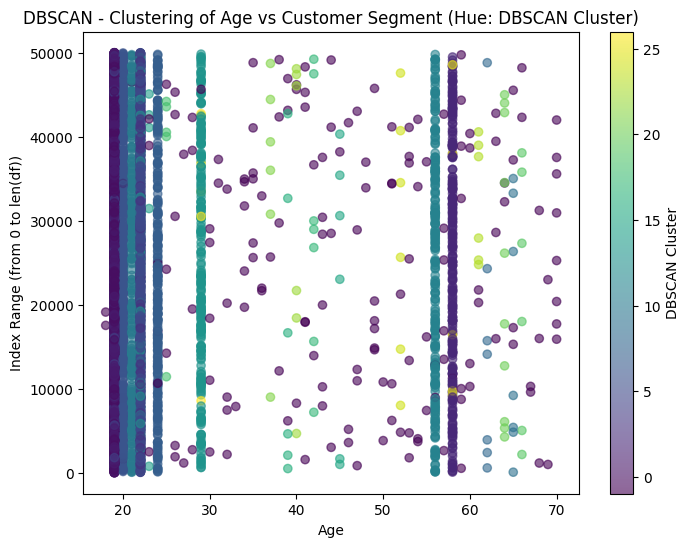

Evaluating KMeans
KMeans Clustering labels for test data: [1 1 0 ... 1 2 2]


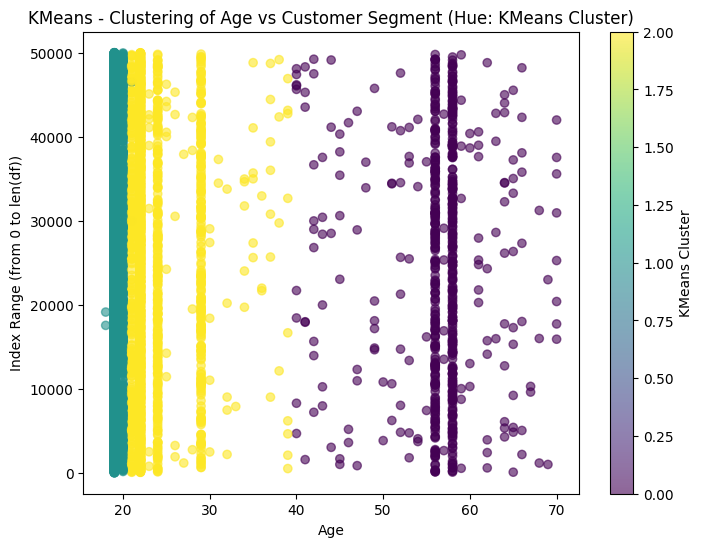

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_preprocess(file_path, target_column):
    df = pd.read_excel(file_path)
    df.fillna(df.mode().iloc[0], inplace=True)
    X = df[['Age', target_column]].copy()
    X['Customer_Segment_encoded'] = X[target_column].astype('category').cat.codes
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
    return X_train, X_test, df

def evaluate_dbscan(X_train, X_test, df, target_column):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels_train = dbscan.fit_predict(X_train[['Age', 'Customer_Segment_encoded']])
    labels_test = dbscan.fit_predict(X_test[['Age', 'Customer_Segment_encoded']])
    print(f"DBSCAN Clustering labels for test data:", labels_test)
    df['index_range'] = range(len(df))
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_test['Age'], df.loc[X_test.index, 'index_range'], c=labels_test, cmap='viridis', alpha=0.6)
    plt.title(f"DBSCAN - Clustering of Age vs Customer Segment (Hue: DBSCAN Cluster)")
    plt.xlabel('Age')
    plt.ylabel('Index Range (from 0 to len(df))')
    plt.colorbar(label='DBSCAN Cluster')
    plt.show()

def evaluate_kmeans(X_train, X_test, df, target_column, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_train = kmeans.fit_predict(X_train[['Age', 'Customer_Segment_encoded']])
    labels_test = kmeans.predict(X_test[['Age', 'Customer_Segment_encoded']])
    print(f"KMeans Clustering labels for test data:", labels_test)
    df['index_range'] = range(len(df))
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_test['Age'], df.loc[X_test.index, 'index_range'], c=labels_test, cmap='viridis', alpha=0.6)
    plt.title(f"KMeans - Clustering of Age vs Customer Segment (Hue: KMeans Cluster)")
    plt.xlabel('Age')
    plt.ylabel('Index Range (from 0 to len(df))')
    plt.colorbar(label='KMeans Cluster')
    plt.show()

def main(file_path, target_column):
    X_train, X_test, df = load_and_preprocess(file_path, target_column)
    print(f"Evaluating DBSCAN")
    evaluate_dbscan(X_train, X_test, df, target_column)
    print(f"Evaluating KMeans")
    evaluate_kmeans(X_train, X_test, df, target_column)

if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/Project/Unsupervised.xlsx'
    target_column = 'Customer_Segment'
    main(file_path, target_column)

# **Conclusion**
---
#### The clustering models, KMeans and DBSCAN, successfully identified customer segments, with KMeans providing distinct, well-separated groups, while DBSCAN demonstrated flexibility in handling noise but with less clear cluster boundaries. The evaluation metrics, such as the silhouette score, indicated that KMeans performed better in defining customer clusters compared to DBSCAN, aligning more closely with the true customer segments.